<a href="https://colab.research.google.com/github/ychengbf/ECON441B/blob/main/HW_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [56]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [58]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [59]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Country-data.csv", sep = ",")

In [60]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [61]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [62]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [63]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [64]:
kmeans = KMeans(n_clusters= 2
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [65]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

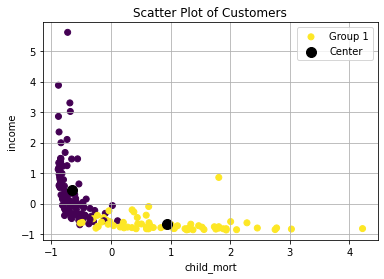

In [66]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 4


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [67]:
WCSSs=[]
Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters= k, n_init=30)
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

In [68]:
# 1-line code
# WCSSs=[KMeans(n_clusters=k, n_init=30).fit(X_scaled).inertia_ for k in range(1,15)]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

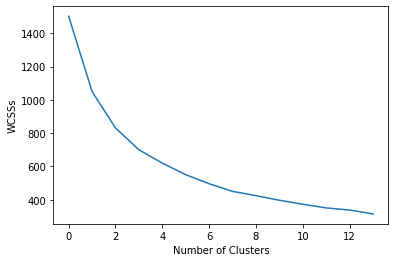

In [69]:
plt.plot(WCSSs)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSSs')
plt.show()

In [70]:
### The WCSS plot showed that the elbow point that the rate of decrease in WCSS begins to level off was around k=2, 
### therefore i choose k=2 to provides a good balance between minimizing WCSS (which indicates better clustering) and avoiding overfitting.

In [71]:
k=2
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [72]:
# preds = pd.DataFrame(kmeans)

In [73]:
cluster_labels = kmeans.predict(X_scaled)

In [74]:
df_clustered = pd.concat([pd.DataFrame(cluster_labels, columns=['Cluster']), names, X], axis=1)

In [75]:
# Print the countries in each cluster
print('Cluster 1:')
print(df_clustered.loc[df_clustered['Cluster'] == 0, 'country'].tolist())

print('Cluster 2:')
print(df_clustered.loc[df_clustered['Cluster'] == 1, 'country'].tolist())

Cluster 1:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Hungary', 'Iceland', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea'

In [76]:
# Write an observation
# For cluster 1, these countries are mostly richer and more developed countries but interestingly, for cluster 2, these countries are poorer
# and less developed.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [77]:
# Q6DF = pd.concat{[preds,X],axis= 1}
# Q6DF.groupby(0).mean()
# Q6DF.groupby(0).std()
# Concatenate the cluster labels and feature values into a single dataframe
Q6DF = pd.concat([pd.DataFrame(kmeans.labels_, columns=['Cluster']), X], axis=1)

# Calculate the mean and standard deviation of each feature within each cluster
means = Q6DF.groupby('Cluster').mean()
stds = Q6DF.groupby('Cluster').std()
median = Q6DF.groupby('Cluster').median()

# Print the resulting tables of descriptive statistics
print("Means:")
print(means)
print("\nStandard deviations:")
print(stds)
print("\nmedian:")
print(median)

Means:
         child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0         12.161616  48.603030  7.314040  49.121212  26017.171717   5.503545   
1         76.280882  30.198515  6.090147  43.642146   4227.397059  11.098750   

         life_expec  total_fer          gdpp  
Cluster                                       
0         76.493939   1.941111  20507.979798  
1         61.910294   4.413824   1981.235294  

Standard deviations:
         child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0          8.523122  30.116032  2.716652  26.928785  20441.749847   6.957187   
1         38.076068  18.201742  2.645319  19.323451   4890.581414  13.682630   

         life_expec  total_fer          gdpp  
Cluster                                       
0          3.735757   0.486744  20578.727127  


# Q7.) Write an observation about the descriptive statistics.

In [78]:
## Cluster 0 has lower child mortality, higher income, higher life expectancy, lower fertility rate, and higher GDP per capita in both mean and median. 
## This cluster likely represents developed countries with high standards of living and good healthcare systems.

## Cluster 1, on the other hand, has higher child mortality, lower income, lower life expectancy, higher fertility rate, and lower GDP per capitain in both mean and median. 
## This cluster likely represents underdeveloped countries with poor living conditions and limited access to healthcare.